In [1]:
%load_ext autoreload
%autoreload 2
from factor_processing_utils import *
from compare_dataframes import *

In [13]:
start_date = "2015-01-01"
end_date = "2025-07-01"
index_item = "000852.XSHG"

change_day = 20
month_day = 20
year_day = 252

stock_universe = INDEX_FIX(start_date, end_date, index_item)
stock_list = stock_universe.columns.tolist()
date_list = stock_universe.index.tolist()

factor_name = "atdy_mrq"
raw_path = f"factor_lib/raw/{factor_name}_{index_item}_{start_date}_{end_date}.pkl"
processed_path = (
    f"factor_lib/processed/{factor_name}_{index_item}_{start_date}_{end_date}.pkl"
)

try:
    processed_factor = pd.read_pickle(processed_path)
    print("Factor loaded from pickle.")

except:
    factor_definition = Factor("cash_flow_from_operating_activities_mrq_0") / Factor(
        "total_assets_mrq_0"
    )
    raw_factor = execute_factor(factor_definition, stock_list, start_date, end_date)
    processed_factor = preprocess_factor(raw_factor, stock_universe, index_item)
    processed_factor.to_pickle(processed_path)

# 计算IC
ic, performance = calc_ic(processed_factor, change_day, index_item, factor_name)

Factor loaded from pickle.
{'name': 'atdy_mrq', 'change_day': 20, 'IC mean': 0.021, 'IC std': 0.0505, 'ICIR': 0.4167, 'IC>0': 0.6669, 'ABS_IC>2%': 0.7464, 't_stat': 20.9536}


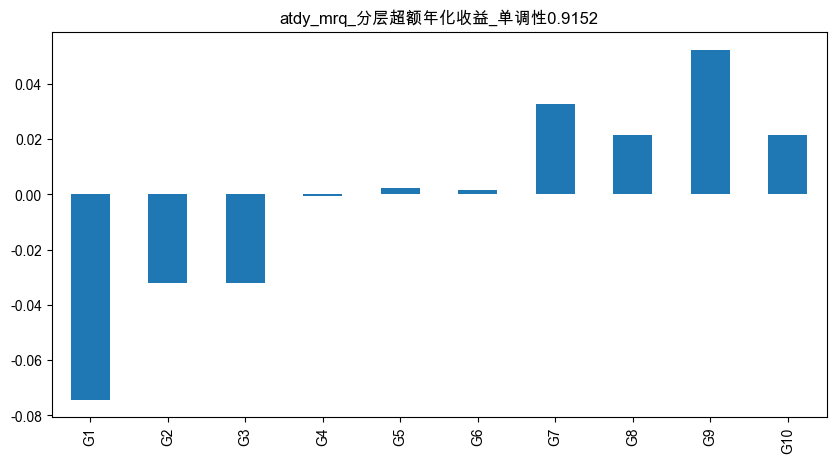

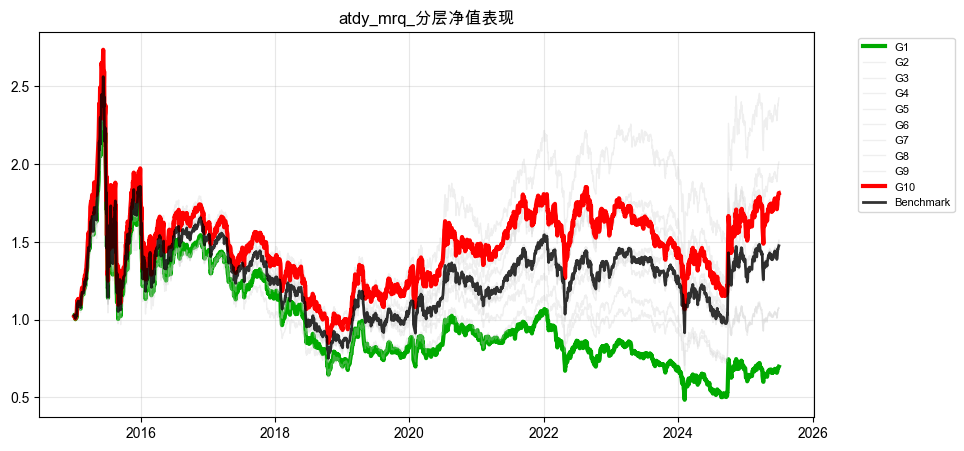

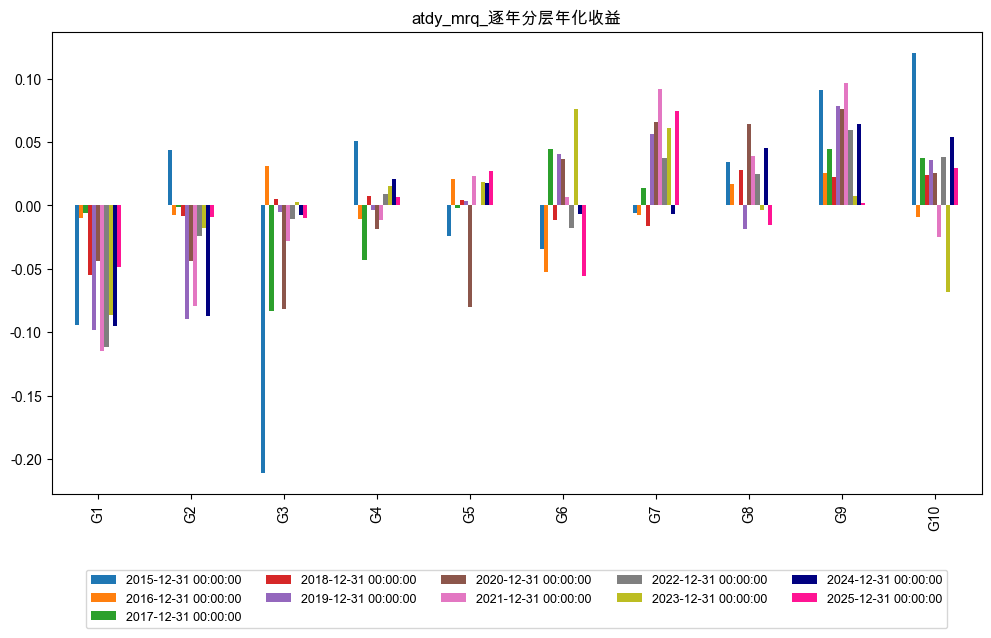

In [14]:
return_group, turnover_ratio = factor_layered_backtest(
    processed_factor, change_day, 10, index_item, name=factor_name
)